In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.read_csv('data/country_names_area.csv')
# only taking country_are
pd.read_csv('data/midyear_population_5yr_age_sex.csv')
pd.read_csv('data/midyear_population.csv')

births = pd.read_csv('data/birth_death_growth_rates.csv')
fertility = pd.read_csv('data/age_specific_fertility_rates.csv')
# Taking gross repro rate 3 ranges
mortality = pd.read_csv('data/mortality_life_expectancy.csv')
# taking out 0 to 4 mortality
births

,country_code,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate
0,SI,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682
1,SI,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444
2,SI,Slovenia,2023,7.43,12.41,0.31,-0.498,-0.467
3,SI,Slovenia,2024,7.35,12.55,0.31,-0.520,-0.489
4,SI,Slovenia,2025,7.30,12.68,0.30,-0.538,-0.508
...,...,...,...,...,...,...,...,...
15104,BP,Solomon Islands,2000,34.93,4.53,-2.51,3.040,2.789
15105,BP,Solomon Islands,1999,35.48,4.61,-2.58,3.087,2.829
15106,BP,Solomon Islands,1998,35.98,4.70,-2.45,3.128,2.884
15107,BP,Solomon Islands,1997,36.44,4.79,-2.31,3.165,2.934


Deleting unimportant features in mortality and Fertility

In [4]:
mortality.drop(['mortality_rate_1to4', 'mortality_rate_1to4_male', 'mortality_rate_1to4_female'], axis=1, inplace=True)
mortality

,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
0,SI,Slovenia,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44
1,SI,Slovenia,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81
2,SI,Slovenia,2023,3.73,4.18,3.25,79.26,75.73,83.02,4.39,4.97,3.78
3,SI,Slovenia,2024,3.70,4.14,3.22,79.40,75.89,83.15,4.35,4.91,3.74
4,SI,Slovenia,2025,3.67,4.10,3.20,79.55,76.04,83.29,4.31,4.86,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,25.68,29.05,22.13,71.28,68.86,73.81,32.31,36.33,28.08
15102,BP,Solomon Islands,1999,26.55,30.01,22.91,70.99,68.59,73.51,33.49,37.61,29.15
15103,BP,Solomon Islands,1998,27.45,31.01,23.71,70.70,68.32,73.20,34.71,38.94,30.26
15104,BP,Solomon Islands,1997,28.38,32.04,24.54,70.40,68.04,72.88,35.97,40.32,31.40


In [5]:
fertility.drop('gross_reproduction_rate',axis=1, inplace=True)
fertility

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,sex_ratio_at_birth
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,1.0660
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,1.0661
2,SI,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,1.0660
3,SI,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,1.0660
4,SI,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,1.0661
...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,80.4,197.7,232.8,196.5,132.5,65.3,20.9,4.6300,1.0501
15102,BP,Solomon Islands,1999,82.9,202.6,237.0,200.1,135.9,67.2,21.5,4.7360,1.0500
15103,BP,Solomon Islands,1998,85.5,207.5,241.1,203.7,139.3,69.1,22.2,4.8420,1.0500
15104,BP,Solomon Islands,1997,88.0,212.4,245.3,207.4,142.7,71.0,22.9,4.9480,1.0499


In [6]:
pop_changes = pd.merge(fertility, births, on = ['country_code', 'country_name', 'year'], how = 'left')

pop_changes = pd.merge(pop_changes, mortality, on = ['country_code', 'country_name', 'year'], how = 'left')

In [66]:
pop_changes

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,...,growth_rate,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,...,-0.682,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,...,-0.444,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81
2,SI,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,...,-0.467,3.73,4.18,3.25,79.26,75.73,83.02,4.39,4.97,3.78
3,SI,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,...,-0.489,3.70,4.14,3.22,79.40,75.89,83.15,4.35,4.91,3.74
4,SI,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,...,-0.508,3.67,4.10,3.20,79.55,76.04,83.29,4.31,4.86,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,80.4,197.7,232.8,196.5,132.5,65.3,20.9,...,2.789,25.68,29.05,22.13,71.28,68.86,73.81,32.31,36.33,28.08
15102,BP,Solomon Islands,1999,82.9,202.6,237.0,200.1,135.9,67.2,21.5,...,2.829,26.55,30.01,22.91,70.99,68.59,73.51,33.49,37.61,29.15
15103,BP,Solomon Islands,1998,85.5,207.5,241.1,203.7,139.3,69.1,22.2,...,2.884,27.45,31.01,23.71,70.70,68.32,73.20,34.71,38.94,30.26
15104,BP,Solomon Islands,1997,88.0,212.4,245.3,207.4,142.7,71.0,22.9,...,2.934,28.38,32.04,24.54,70.40,68.04,72.88,35.97,40.32,31.40


Aggregating Fertility rates to <20, 20 to 40, and 40+

In [7]:
pop_changes['fertility_rate_40+'] = pop_changes['fertility_rate_40_44'] + pop_changes['fertility_rate_45_49']
pop_changes['fertility_rate_20_to_40'] = pop_changes['fertility_rate_20_24'] + pop_changes['fertility_rate_25_29'] + pop_changes['fertility_rate_30_34'] + pop_changes['fertility_rate_35_39']
pop_changes['fertility_rate_Under_20'] = pop_changes['fertility_rate_15_19']
pop_changes

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,...,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,fertility_rate_40+,fertility_rate_20_to_40,fertility_rate_Under_20
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,...,3.00,80.90,77.51,84.52,3.93,4.39,3.44,12.5,290.5,8.5
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,...,3.27,79.11,75.58,82.89,4.43,5.02,3.81,8.7,264.7,7.5
2,SI,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,...,3.25,79.26,75.73,83.02,4.39,4.97,3.78,9.0,266.5,7.6
3,SI,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,...,3.22,79.40,75.89,83.15,4.35,4.91,3.74,9.2,268.4,7.7
4,SI,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,...,3.20,79.55,76.04,83.29,4.31,4.86,3.71,9.5,270.0,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,80.4,197.7,232.8,196.5,132.5,65.3,20.9,...,22.13,71.28,68.86,73.81,32.31,36.33,28.08,86.2,759.5,80.4
15102,BP,Solomon Islands,1999,82.9,202.6,237.0,200.1,135.9,67.2,21.5,...,22.91,70.99,68.59,73.51,33.49,37.61,29.15,88.7,775.6,82.9
15103,BP,Solomon Islands,1998,85.5,207.5,241.1,203.7,139.3,69.1,22.2,...,23.71,70.70,68.32,73.20,34.71,38.94,30.26,91.3,791.6,85.5
15104,BP,Solomon Islands,1997,88.0,212.4,245.3,207.4,142.7,71.0,22.9,...,24.54,70.40,68.04,72.88,35.97,40.32,31.40,93.9,807.8,88.0


In [56]:
#Final dataset
pop_changes_final = pop_changes.drop(['fertility_rate_15_19','fertility_rate_20_24', 'fertility_rate_25_29', 'fertility_rate_30_34',
       'fertility_rate_35_39', 'fertility_rate_40_44', 'fertility_rate_45_49'], axis=1)
print(pop_changes_final['country_name'].unique())
print(pop_changes_final.columns)
pop_changes_final

['Slovenia' 'Latvia' 'Mongolia' 'Mauritania' 'Liberia' 'Saint Barthelemy'
 'Ukraine' 'Cyprus' 'Venezuela' 'Ethiopia' 'Zambia' 'Nauru' 'Mexico'
 'Eritrea' 'Curacao' 'Russia' 'Korea South' 'Somalia' 'Moldova' 'Monaco'
 'Indonesia' 'Malawi' 'Afghanistan' 'Tuvalu' 'Western Sahara' 'Armenia'
 'Kenya' 'Wallis and Futuna' 'New Zealand' 'Iceland' 'Dominican Republic'
 'Swaziland' 'Equatorial Guinea' 'Saint Martin' 'Hungary' 'Fiji'
 'Zimbabwe' 'Egypt' 'Gaza Strip' 'Liechtenstein' 'Sweden' 'Norway'
 'Singapore' 'Slovakia' 'Saudi Arabia' 'French Polynesia' 'Saint Helena'
 'United States' 'Central African Republic' 'Anguilla' 'Kazakhstan'
 'Guinea-Bissau' 'Cook Islands' 'Grenada' 'Greece'
 'Micronesia Federated States of' 'China' 'Peru' 'Antigua and Barbuda'
 'Cayman Islands' 'Gibraltar' 'Switzerland' 'Saint Kitts and Nevis'
 'Brunei' 'Spain' "Cote d'Ivoire" 'Estonia' 'Kosovo' 'Lesotho' 'Bhutan'
 'Pakistan' 'Malta' 'Iraq' 'Canada' 'Macedonia' 'Jamaica' 'Korea North'
 'Albania' 'Uzbekistan' 'Montse

,country_code,country_name,year,total_fertility_rate,sex_ratio_at_birth,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,...,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,fertility_rate_40+,fertility_rate_20_to_40,fertility_rate_Under_20
0,SI,Slovenia,2036,1.5555,1.0660,7.59,14.65,0.23,-0.706,-0.682,...,3.00,80.90,77.51,84.52,3.93,4.39,3.44,12.5,290.5,8.5
1,SI,Slovenia,2022,1.4110,1.0661,7.52,12.28,0.32,-0.476,-0.444,...,3.27,79.11,75.58,82.89,4.43,5.02,3.81,8.7,264.7,7.5
2,SI,Slovenia,2023,1.4213,1.0660,7.43,12.41,0.31,-0.498,-0.467,...,3.25,79.26,75.73,83.02,4.39,4.97,3.78,9.0,266.5,7.6
3,SI,Slovenia,2024,1.4316,1.0660,7.35,12.55,0.31,-0.520,-0.489,...,3.22,79.40,75.89,83.15,4.35,4.91,3.74,9.2,268.4,7.7
4,SI,Slovenia,2025,1.4419,1.0661,7.30,12.68,0.30,-0.538,-0.508,...,3.20,79.55,76.04,83.29,4.31,4.86,3.71,9.5,270.0,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,4.6300,1.0501,34.93,4.53,-2.51,3.040,2.789,...,22.13,71.28,68.86,73.81,32.31,36.33,28.08,86.2,759.5,80.4
15102,BP,Solomon Islands,1999,4.7360,1.0500,35.48,4.61,-2.58,3.087,2.829,...,22.91,70.99,68.59,73.51,33.49,37.61,29.15,88.7,775.6,82.9
15103,BP,Solomon Islands,1998,4.8420,1.0500,35.98,4.70,-2.45,3.128,2.884,...,23.71,70.70,68.32,73.20,34.71,38.94,30.26,91.3,791.6,85.5
15104,BP,Solomon Islands,1997,4.9480,1.0499,36.44,4.79,-2.31,3.165,2.934,...,24.54,70.40,68.04,72.88,35.97,40.32,31.40,93.9,807.8,88.0


In [ ]:
# Creating Region Variable

regions = {
    'Western Europe': ['Slovenia', 'Latvia', 'Cyprus', 'Ukraine', 'Russia', 'Moldova', 'Monaco', 'France', 'Belgium', 'Luxembourg', 'United Kingdom', 'Ireland', 'Netherlands', 'Italy', 'Germany', 'Switzerland', 'Austria', 'Liechtenstein', 'Portugal', 'Spain', 'Andorra', 'Gibraltar'],
    'North America': ['Saint Barthelemy', 'Mexico', 'Curacao', 'United States', 'Anguilla', 'Montserrat', 'Canada', 'Panama', 'Bermuda', 'Bahamas The', 'Virgin Islands U.S.', 'Puerto Rico', 'Turks and Caicos Islands', 'Cayman Islands', 'Belize', 'Guam', 'Aruba', 'American Samoa', 'Saint Pierre and Miquelon', 'Northern Mariana Islands'],
    'Australia and New Zealand': ['New Zealand', 'Australia'],
    'Middle East and Northern Africa': ['Mauritania', 'Western Sahara', 'Somalia', 'Afghanistan', 'Saudi Arabia', 'Egypt', 'Gaza Strip', 'Korea South', 'United Arab Emirates', 'Yemen', 'Syria', 'Turkey', 'Jordan', 'Israel', 'West Bank', 'Iraq', 'Iran', 'Kuwait', 'Oman', 'Qatar', 'Bahrain', 'Lebanon'],
    'Latin America and Caribbean': ['Venezuela', 'Swaziland', 'Dominican Republic', 'Equatorial Guinea', 'Saint Martin', 'Saint Kitts and Nevis', 'Brunei', 'French Polynesia', 'Cook Islands', 'Greece', 'Micronesia Federated States of', 'Peru', 'Antigua and Barbuda', 'Saint Helena', 'Central African Republic', 'Grenada', 'Sierra Leone', 'Mauritius', 'Trinidad and Tobago', 'Cambodia', 'Czechia', 'South Africa', 'Costa Rica', 'Isle of Man', 'Hong Kong', 'Bermuda', 'Papua New Guinea', 'Saint Vincent and the Grenadines', 'Greenland', 'El Salvador', 'Bahamas The', 'Laos', 'Belize', 'Portugal', 'Sri Lanka', 'Malaysia', 'Philippines', 'Virgin Islands British', 'Guyana', 'Barbados', 'San Marino', 'Georgia', 'Saint Lucia', 'Mozambique', 'Morocco', 'Chile', 'Argentina', 'Brazil', 'Suriname', 'Senegal', 'Palau', 'Congo (Brazzaville)', 'Cameroon', 'Guam', 'Turks and Caicos Islands', 'Croatia', 'Guyana', 'Senegal', 'Thailand', 'United Arab Emirates', 'Tanzania', 'Ghana', 'Barbados', 'Cabo Verde', 'San Marino', 'Tonga', 'Georgia', 'Saint Lucia', 'Mozambique', 'Djibouti', 'Morocco', 'Chile', 'New Caledonia', 'Poland', 'Syria', 'Turkey', 'Namibia', 'Bolivia', 'Jersey', 'Marshall Islands', 'Colombia', 'Jordan', 'Mali', 'Kyrgyzstan', 'Yemen', 'Madagascar', 'Faroe Islands', 'Haiti', 'Israel', 'Vanuatu', 'Gabon', 'Comoros', 'Solomon Islands', 'Australia', 'Guinea', 'Honduras', 'West Bank', 'Uganda', 'Aruba', 'Paraguay', 'Botswana', 'Guatemala', 'Burundi', 'Saint Pierre and Miquelon', 'Northern Mariana Islands', 'Chad', 'Solomon Islands'],
    'Southeastern Asia': ['Mongolia', 'Indonesia', 'Tuvalu', 'China', 'Singapore', 'Malaysia', 'Hong Kong', 'Brunei', 'Vietnam', 'Cambodia', 'Thailand', 'Philippines', 'Laos', 'Taiwan'],
    'Central and Eastern Europe': ['Ukraine', 'Russia', 'Moldova', 'Monaco', 'Hungary', 'Slovakia', 'Czechia', 'Poland', 'Belarus', 'Macedonia', 'Kosovo', 'Estonia', 'Lithuania', 'Latvia', 'Serbia', 'Montenegro', 'Romania', 'Bulgaria', 'Bosnia and Herzegovina', 'Albania'],
    'Eastern Asia': ['Korea South', 'Russia', 'Korea North', 'China', 'Japan', 'Mongolia', 'Hong Kong', 'Macau', 'Taiwan'],
    'Sub-Saharan Africa': ['Mauritania', 'Liberia', 'Ethiopia', 'Zambia', 'Eritrea', 'Mauritius', 'Kenya', 'Wallis and Futuna', 'Iceland', 'Swaziland', 'Saint Martin', 'Fiji', 'Zimbabwe', 'Swaziland', 'South Africa', 'Lesotho', 'Swaziland', 'South Africa', 'Seychelles', 'Sudan', 'Guinea-Bissau', 'Gambia The', 'Sierra Leone', 'Nigeria', 'Angola', 'Equatorial Guinea', 'Togo', 'Guinea', 'Congo (Kinshasa)', 'Guinea-Bissau', 'Gambia The', 'Guinea', 'Guinea-Bissau', 'Senegal', 'Sierra Leone', 'Togo', 'Burkina Faso', 'Cape Verde', 'Senegal', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Senegal', 'Senegal', 'Guinea-Bissau', 'Guinea-Bissau', '


### Exploring Life Expectancy

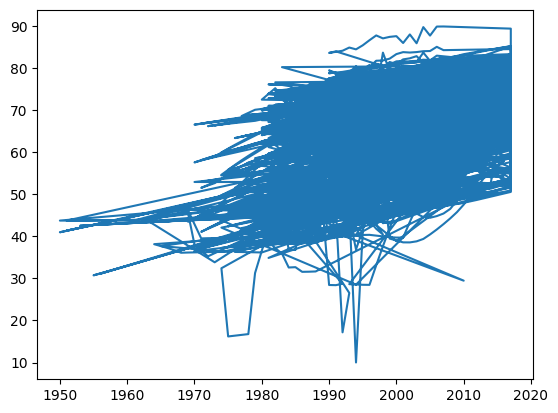

In [24]:
plt.plot('year', 'life_expectancy', data = data)

In [55]:
# Average Life expectancy of countries over time, ranked (using only  real data)
country_life = data.groupby(['country_name'])['life_expectancy'].describe()['mean'].sort_values(ascending=False)
country_life

country_name
Monaco          87.756786
Macau           82.881111
San Marino      82.170000
Japan           81.872500
Andorra         81.472857
                  ...    
Mozambique      45.262105
Niger           45.186829
Sierra Leone    45.040455
Afghanistan     44.776154
Chad            42.669444
Name: mean, Length: 228, dtype: float64

In [52]:
# Average Life expectancy of countries over time, ranked (using only projections)
country_life_pred = predictions.groupby(['country_name'])['life_expectancy'].describe()['mean'].sort_values(ascending=False)
country_life_pred

country_name
Japan            88.866667
Singapore        88.823636
Monaco           88.580909
Macau            84.843030
San Marino       84.015758
                   ...    
Swaziland        57.392424
Botswana         57.265758
Guinea-Bissau    57.248182
Chad             57.043030
Gabon            56.325758
Name: mean, Length: 228, dtype: float64

In [54]:
# Average Life expectancy of countries over time, ranked (using both real data and projections)
total_life = pop_changes_final.groupby('country_name')['life_expectancy'].mean().sort_values(ascending=False)
total_life

country_name
Monaco           88.202623
Japan            85.656230
Singapore        84.992787
Macau            83.960167
San Marino       83.257679
                   ...    
Somalia          52.375000
Guinea-Bissau    51.275833
Afghanistan      51.010556
Nigeria          50.884796
Chad             48.121494
Name: life_expectancy, Length: 228, dtype: float64

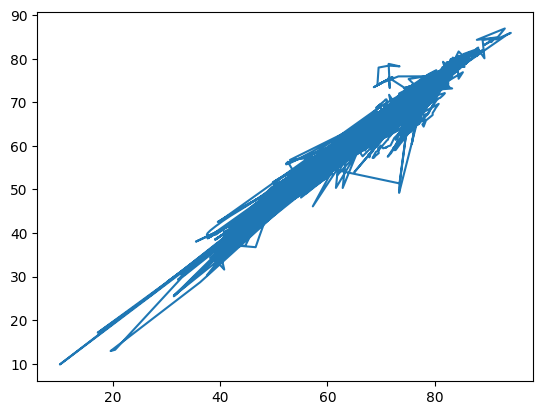

In [57]:
plt.plot('life_expectancy_female', 'life_expectancy_male', data = data)

### Exploring Birth and Growth Rate

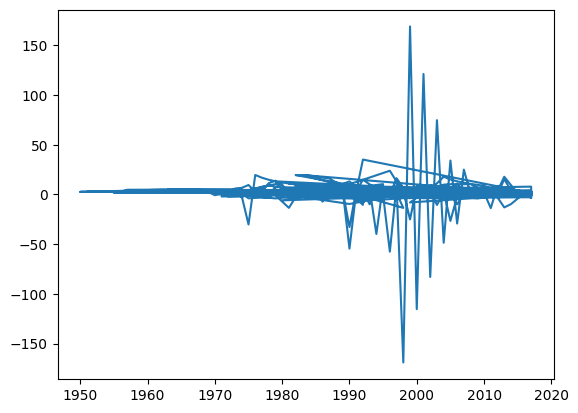

In [58]:
plt.plot('year', 'growth_rate', data = data)

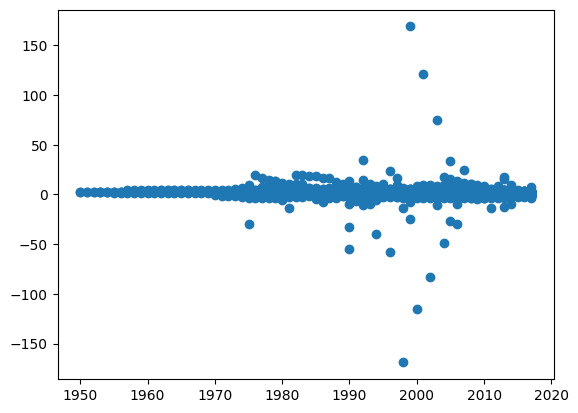

In [60]:
plt.scatter(data['year'], data['growth_rate'])